In [17]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [18]:
img1 = cv2.imread('/content/image.jpg')
img2 = cv2.imread("/content/result.jpg")

img1 = cv2.resize(img1, (600, 450))
img2 = cv2.resize(img2, (600, 450))

img_height = img1.shape[0]

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

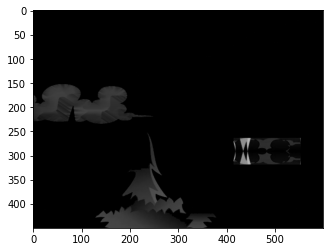

In [19]:
diff = cv2.absdiff(gray1, gray2)
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.show()

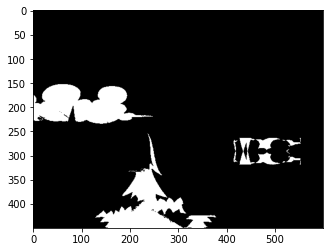

In [20]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

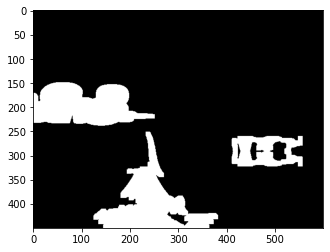

In [21]:
kernel = np.ones((5, 5), np.uint8)
dilate = cv2.dilate(thresh, kernel, iterations=2)
plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
plt.show()

103
248
204


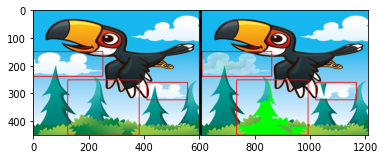

In [22]:
contours = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for contour in contours:
    print(len(contour))
    if cv2.contourArea(contour) > 100:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)

x = np.zeros((img_height, 10, 3), np.uint8)
result = np.hstack((img1, x, img2))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()